 # **Заревич Михаил 513-2**
Анализ датасета Boston housing https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv


Цель:

Проанализировать датасет. Построить модели для предсказывания значения целевой переменной - цены дома по значению других признаков. Выбрать наилучшую модель.



Математическая постановка задачи:

Целевая переменная является числовой, поэтому будем использовать линейную регрессию.
Задачей линейной регрессии является приближение значения целевой переменной y при помощи признака x.

$$y(x)= kx + b$$

Сначала требуется найти ковариацию двух признаков:

 $$ COV(X, Y) = M((X-M(X)(Y-M(Y)) $$

 Затем найти их коэффициент корреляции:
  $$ r_xy = \frac{COV(X,Y)}{\sigma_x\sigma_y} $$


Чем ближе значение к 1 или -1, тем больше оснований считать, что данные случайные величины линейно зависимы. Нужно отобрать переменные с самым большим коэффициентом и на их основе предсказывать цену.

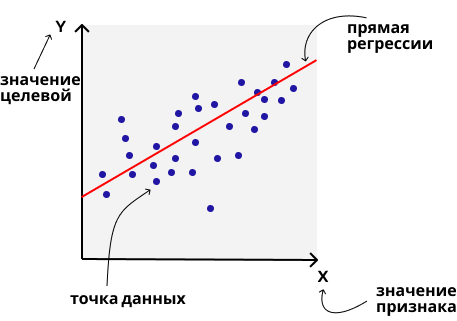

## Подготовка данных

In [111]:
import pandas as pd
import numpy as np
import scipy
import math

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.gofplots

# Функция, разбивающая выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

# Метрики
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


In [112]:
# Загрузка датасета Boston housing
Url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
Data = pd.read_csv(Url)

Колонки датасета

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in \$1000's

In [113]:
Data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Проверка типов данных

In [114]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Проверка данных на полноту. Видно, что все колонки заполнены.

In [115]:
print(Data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


## Анализ распределения целевой переменной medv.

В качестве целевой переменной выберем medv - стоимость жилья. Проанализируем её распределение.


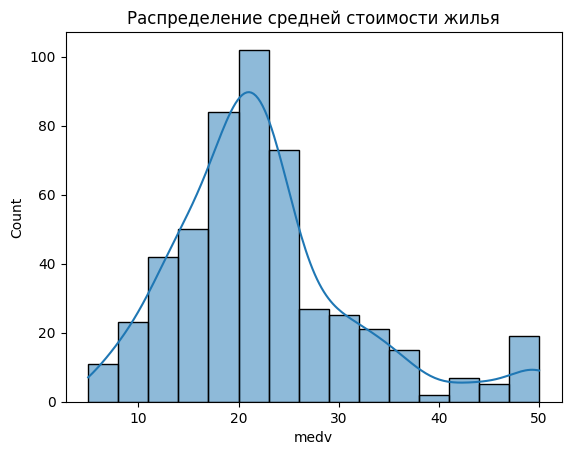

In [116]:
sns.histplot(Data['medv'], bins=15, kde=True)
plt.title('Распределение средней стоимости жилья')
plt.show()

Из графика видно, что распределение похоже на нормальное, но в датасете присутствуют некоторые выбросы. Удалим их и проведём проверку.

In [117]:
# функция, которая проверяет, находится ли значение в интерквартильном размахе
def outlier_IQR_search(data, feature, threshold = 1.5):

    # Интерквартильный размах
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    low = data[feature].quantile(0.25) - (IQR * threshold)
    up = data[feature].quantile(0.75) + (IQR * threshold)
    borders = (low, up)

    outliers = pd.concat([data[feature] < low, data[feature] > up], axis=1) # если входит в нужный размах - True, иначе False

    outliers_index = outliers.any(axis=1)
    num_outliers = outliers_index.value_counts().get(1, 0)

    print('Количество выбросов в данных:', num_outliers)
    print('Доля выбросов:', num_outliers/len(outliers_index))

    return outliers_index, borders

In [118]:
IsOutlierList, Borders = outlier_IQR_search(Data, 'medv')
Borders

Количество выбросов в данных: 40
Доля выбросов: 0.07905138339920949


<ipython-input-117-67d48777fe04>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_outliers = outliers_index.value_counts().get(1, 0)


(np.float64(5.0624999999999964), np.float64(36.962500000000006))

Анализ medv без выбросов

In [119]:
WithoutOutliers = Data['medv'][~IsOutlierList] # Цены без выбросов


Распределение значений без выбросов уже больше напоминает нормальное.

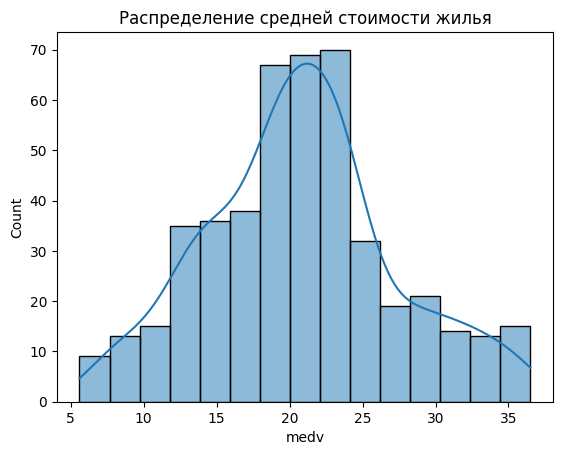

In [120]:
sns.histplot(WithoutOutliers, bins=15, kde=True)
plt.title('Распределение средней стоимости жилья')
plt.show()

Числовые характеристики выборки

In [121]:
print("Выборочное математическое ожидание: ", WithoutOutliers.mean())
print("Выборочная дисперсия: ", WithoutOutliers.var())
print("Выборочное ско: ", WithoutOutliers.std())
print("Выборочный коэффициент ассиметрии: ", WithoutOutliers.skew())
print("Выборочный эксцесс: ", WithoutOutliers.kurtosis())

Выборочное математическое ожидание:  20.719098712446353
Выборочная дисперсия:  41.620774239697276
Выборочное ско:  6.451416452198484
Выборочный коэффициент ассиметрии:  0.20256283436312952
Выборочный эксцесс:  -0.11829814359992152


Выдвенем нулевую гипотезу: цена имеет нормальное распределение с параметрами (20.719, 41.620).

Сравним квантили распределения цен с квантилями нормального распределения с соответствующими параметрами. Если распределения подобны, точки должны лежать на прямой y=x.

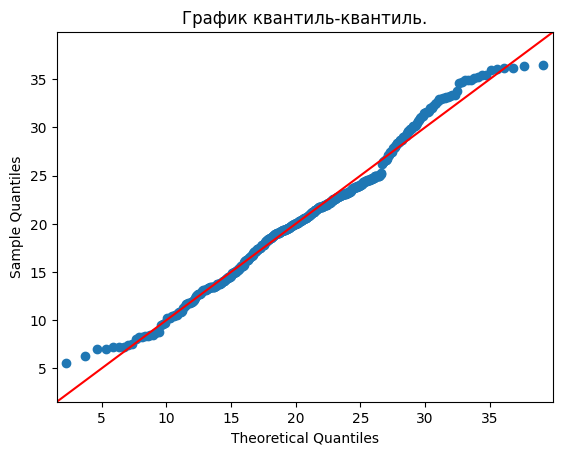

In [122]:
statsmodels.graphics.gofplots.qqplot(WithoutOutliers, scipy.stats.norm(WithoutOutliers.mean(), WithoutOutliers.std()), line = "45")
plt.title("График квантиль-квантиль.")
plt.show()

Проверка по критерию Колмогорова-Смирнова

In [123]:
KSTest = scipy.stats.kstest(WithoutOutliers , "norm", args = (WithoutOutliers.mean(),  WithoutOutliers.std()))
print("Наблюдаемое значение критерия: ", KSTest[0])
print("P-значение: ", KSTest[1])

Наблюдаемое значение критерия:  0.06893665704895569
P-значение:  0.02271911745196633


In [124]:
gammas = [0.995, 0.99, 0.95]
print("Критические значения: ")
for i in gammas:
    print(i, scipy.stats.kstwo.ppf(i, len(WithoutOutliers)))

Критические значения: 
0.995 0.07978380060960875
0.99 0.07501192921130068
0.95 0.06254350627705779


**Вывод.**

Если убрать выбросы, цена будет иметь нормальное распределение с параметрами (20.719, 41.620) с доверительной вероятностью 0,99.

Тем не менее, при дальнейшем анализе я буду рассматривать данные с выбросами, так как я считаю, что, поскольку они присутствуют в датасете, эти значения действительно присутствуют на рынке и несут определённую информацию, а не являются промахами.

## Исследование корреляций между переменными


Используем корреляционную матрицу Пирсона. Элементами матрицы являются коэффициенты корреляции, которые считается следующим образом:

 $$ r_xy = \frac{COV(X,Y)}{\sigma_x\sigma_y} $$

Чем ближе значение к 1 или -1, тем больше оснований считать, что данные случайные величины линейно зависимы.


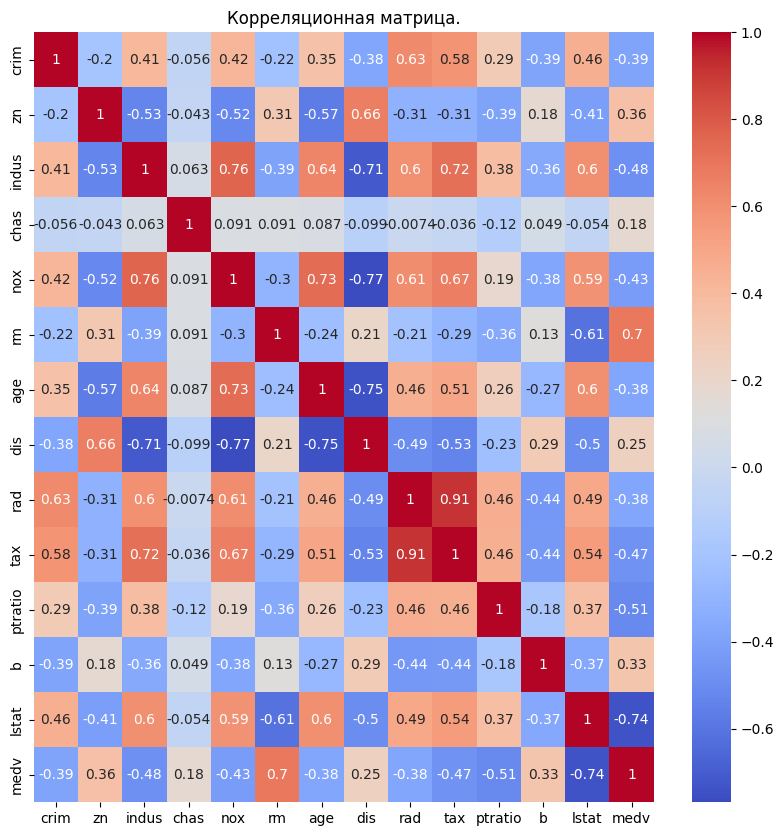

In [125]:
CorrMatrix = Data.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(CorrMatrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица.")
plt.show()

Корреляция цены с другими параметрами.


In [140]:
TargetCorr = CorrMatrix['medv'].sort_values(ascending=False)
TargetCorr

,medv
medv,1.000000
rm,0.695360
zn,0.360445
b,0.333461
dis,0.249929
chas,0.175260
age,-0.376955
rad,-0.381626
crim,-0.388305
nox,-0.427321


**Вывод**

Наиболее сильно с ценой коррелируют:


1.   Rm - количество комнат. Чем больше количество комнат, тем больше цена.
2.   Ptratio - отношение школьников к учителям. Чем оно больше, тем цена ниже.
3.   lstat - доля взрослых, не имеющих среднего образования, и доля мужчин, относящихся к категории чернорабочих. Чем их больше, тем ниже цена.

На их основе будем предсказывать значение цены.


In [127]:
ImportantFeatures = ["rm", "ptratio", "lstat"]

## Разделение на тренировочную и тестовую выборки

Разделим данные на обучающую и тестовую выборки. X - Признаки. Y - целевая переменная, значение которой нужно предсказать. Т.е. по значениям признаков будем предсказывать цену дома.

In [142]:
X = Data[ImportantFeatures] # Признаки
y = Data['medv'] # Значения целевой переменной

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

Для градиентного спуска лучше нормализовать данные.

In [129]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

## Обучение моделей и оценка качества


Качество модели будем анализировать по метрикам MAE и MSE,

Наиболее информативные, на мой взгляд, метрики.
1. MAE - Mean Absolute Error. Средняя абсолютная ошибка.
 $$ MAE = \frac{1}{n} \sum_{i=1}^n|y_i - \hat{y_i}| $$
Сумма модулей отклонений предсказанных значений от эталонных значений из датасета. Показывает, на сколько в среднем предсказанные значения были далеки от идеальных.

2. MAPE - mean absolute percentage error.
$$ MAPE = \frac{1}{n} \sum_{i=1}^n\left|{\frac{y_i - \hat{y_i}}{y_i}}\right| $$
Это же отклонение, но в процентах.

Менее информативные метрики
3.   MSE - Mean Squared Error. Среднеквадратичная ошибка. Что-то типа дисперсии.
 $$ MSE = \frac{1}{n} \sum_{i=1}^n(y_i - \hat{y_i})^2 $$
 Средняя сумма квадратов отклонений предсказанных значений от эталонных значений из датасета. Чем ближе она к нулю, тем лучше модель адаптировалась под данные.


4.   RMSE - квадратный корень из MSE. Что-то типа среднеквадратичного отклонения.
 $$ RMSE = \sqrt{MSE} $$



Функция для обучения и тестирования моделей.

In [130]:

def model_train_test(model, X_train, y_train, X_test, y_test):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  Параметры:
   model - Модель, которая обучается и тестируется
   X_train - Объекты обучающей выборки
   y_train - Значения целевой переменной обучающей выборки
   X_test - Объекты тестовой выборки
   y_test - Значения целевой переменной тестовой выборки

   Возвращает:
   model - Обученная модель
   pred - Предсказанные значения
   mae - Метрика MAE
   mape - Метрика MAPE
   mse - Метрика MSE
   rmse - Метрика RMSE
  """

  model.fit(X_train, y_train) # Обучение модели на тренировочной выборке
  pred = model.predict(X_test) # Предсказания модели на тестовой выборке

  # метрики ошибок
  mae = mean_absolute_error(y_test, pred)
  mape = mean_absolute_percentage_error(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  rmse = math.sqrt(mse)


  print(f"MAE = {mae}; MAPE = {mape}; MSE = {mse}; RMSE = {rmse}")

  return model, pred, mae, mape, mse, rmse

### Линейная регрессия.

Метод наименьших квадратов OLS - Ordinary Least Squares.

In [131]:
LinearModel, PredLr, MaeLr, MapeLr, MseLr, RmseLr = model_train_test(
    LinearRegression(), # Linear regression по умолчанию использует МНК
    X_train,
    y_train,
    X_test,
    y_test,
)

MAE = 3.3325380783240957; MAPE = 0.17642525757074437; MSE = 27.114957415580577; RMSE = 5.207202455789536


Построим график, показывающий, какие значения предсказала модель.

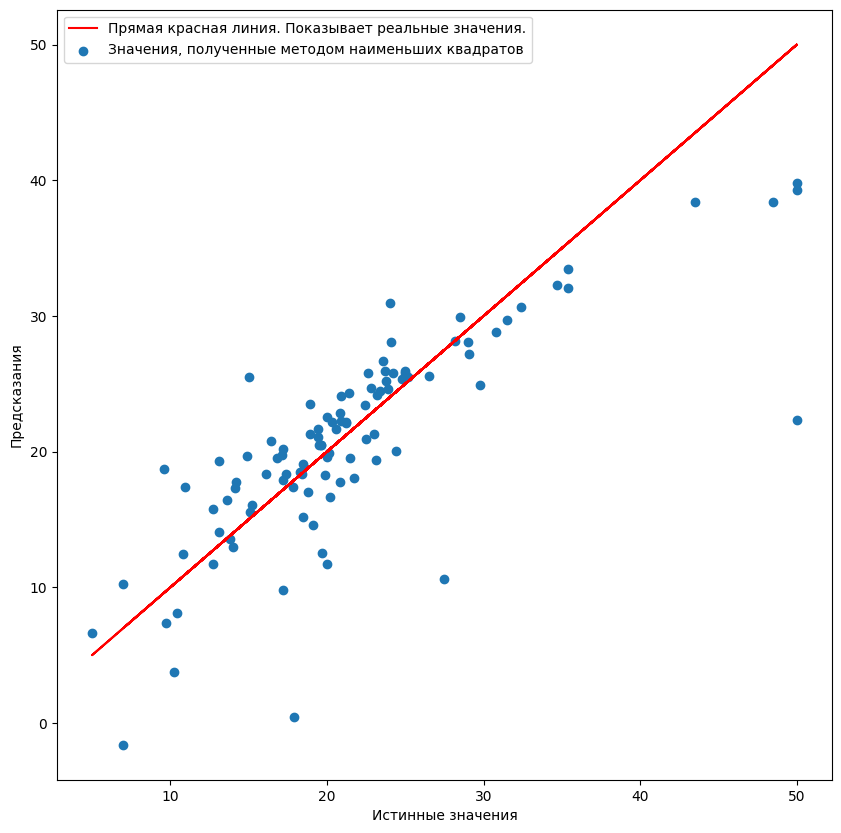

In [132]:
plt.figure(figsize=(10, 10))


# Прямая красная линия. Показывает реальные значения.
plt.plot(y_test, y_test, label="Прямая красная линия. Показывает реальные значения.", color="red")


# Голубые точки. Показывает, какое значение предсказала модель.
plt.scatter(y_test, PredLr, label="Значения, полученные методом наименьших квадратов")


plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

Метод градиентного спуска SGD - Stochastic Gradient Descent

In [133]:
SgdLinearModel, PredSgdLR, MaeSgdLr, MapeSgdLr, MseSgdLr, RmseSgdLr = model_train_test(
    SGDRegressor(),
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
)

MAE = 3.3280467433748155; MAPE = 0.17604660754115475; MSE = 27.07580718822118; RMSE = 5.203441859790612


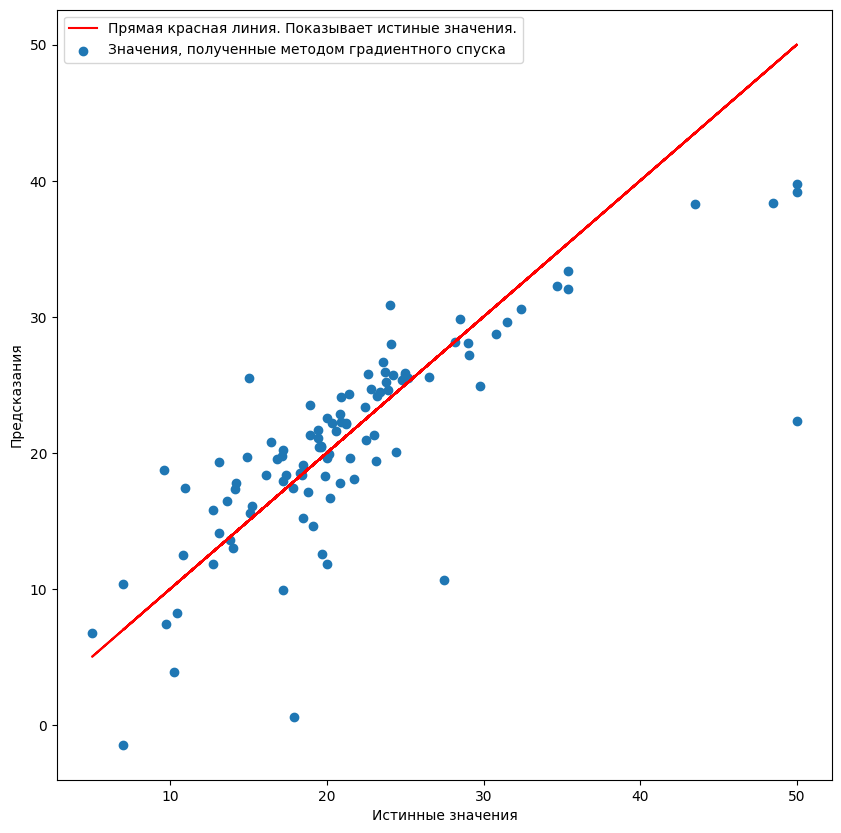

In [134]:
plt.figure(figsize=(10, 10))


# Прямая красная линия. Показывает реальные значения.
plt.plot(y_test, y_test, label="Прямая красная линия. Показывает истиные значения.", color="red")


# Голубые точки. Показывает, какое значение предсказала модель.
plt.scatter(y_test, PredSgdLR, label="Значения, полученные методом градиентного спуска")

plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

### Модель дерева решений

In [135]:
DtreeModel, PredDtree, MaeDtree, MapeDtree, MseDtree, RmseDtree = model_train_test(
    DecisionTreeRegressor(max_depth=5, random_state=42),
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
)

MAE = 2.6227363283549905; MAPE = 0.14108099377629466; MSE = 18.588071211613464; RMSE = 4.311388547975404


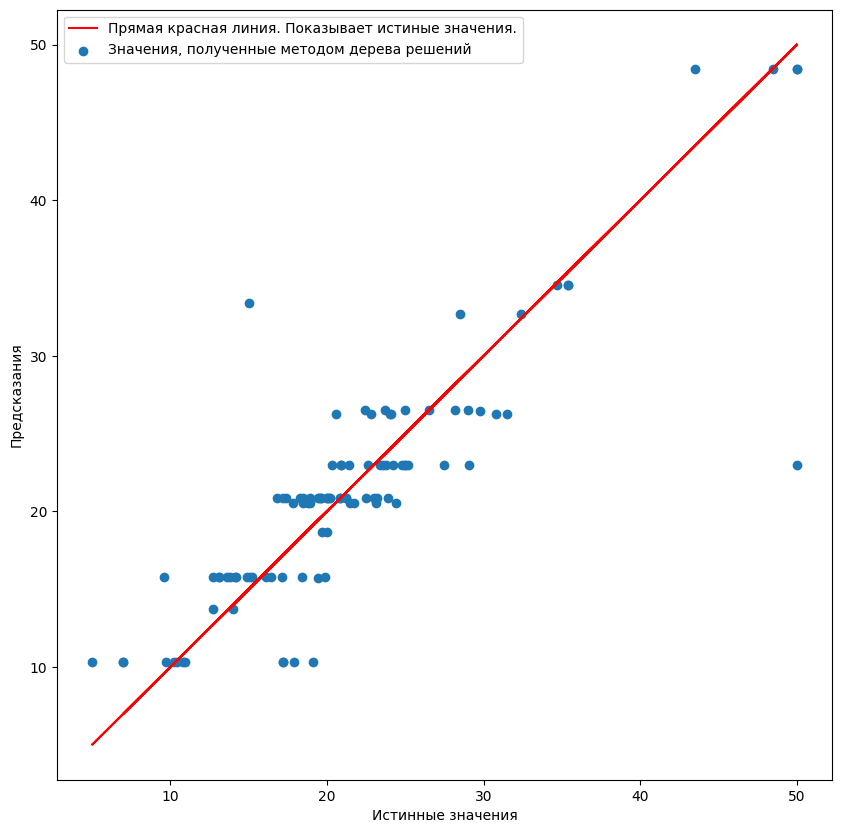

In [136]:
# Прямая красная линия. Показывает реальные значения.
plt.figure(figsize=(10, 10))

plt.plot(y_test, y_test, label="Прямая красная линия. Показывает истиные значения.", color="red")

plt.scatter(y_test, PredDtree, label="Значения, полученные методом дерева решений")

plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

### Выбор лучшей модели


Таблица сравнения моделей

In [137]:
ModelComparison = pd.DataFrame({
    "Модель": ["Метод наименьших квадратов", "Градиентный спуск", "Дерево решений"],
    "MAE": [MaeLr, MaeSgdLr, MaeDtree],
    "MAPE": [MapeLr, MapeSgdLr, MapeDtree],
    "MSE" : [MseLr, MseSgdLr, MseDtree],
    "RMSE": [RmseLr, RmseSgdLr, RmseDtree]
})

ModelComparison.sort_values(by='MAE')

,Модель,MAE,MAPE,MSE,RMSE
2,Дерево решений,2.622736,0.141081,18.588071,4.311389
1,Градиентный спуск,3.328047,0.176047,27.075807,5.203442
0,Метод наименьших квадратов,3.332538,0.176425,27.114957,5.207202


График с предсказаниями всех моделей

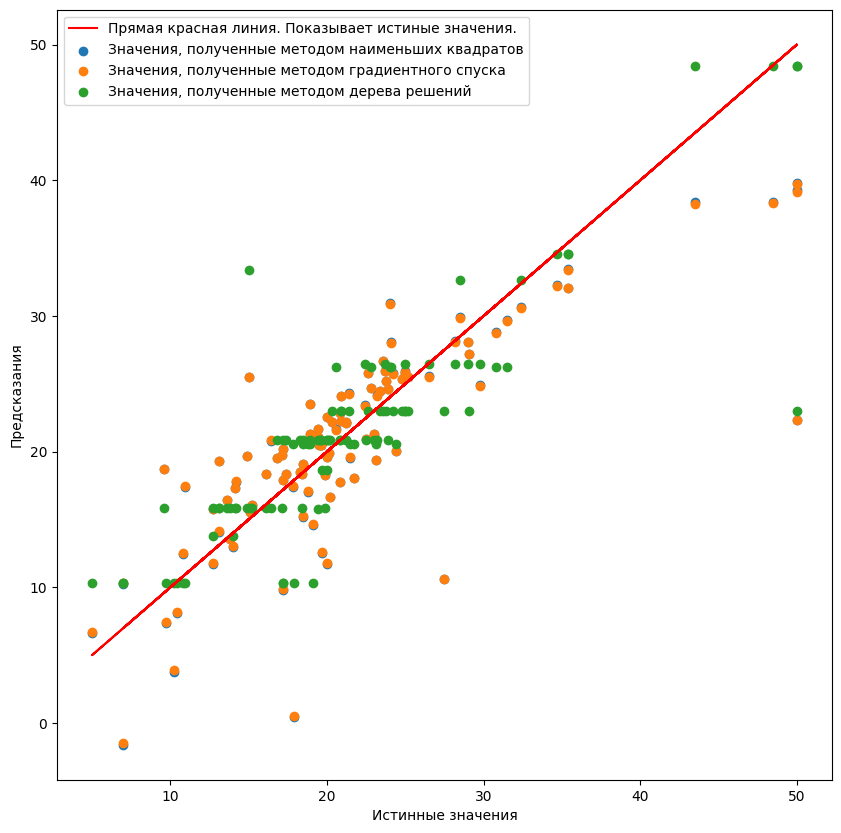

In [138]:
plt.figure(figsize=(10, 10))

plt.plot(y_test, y_test, label="Прямая красная линия. Показывает истиные значения.", color="red")

plt.scatter(y_test, PredLr, label="Значения, полученные методом наименьших квадратов")
plt.scatter(y_test, PredSgdLR, label="Значения, полученные методом градиентного спуска")
plt.scatter(y_test, PredDtree, label="Значения, полученные методом дерева решений")

plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

**Вывод**

Методы наименьших квадратов и градиентного спуска оказались почти идентичными, но оба были хуже дерева решений. Все модели лучше всего предсказывании цены в диапазоне от 10 до 40, это связано с тем, что там находится больше всего значений и модели лучше обучились работать именно с ними.

Наилучшей оказалась модель дерева решений, так как МАЕ у неё была наименьшей. Это же можно понять и из графика. Видно, что предсказания этой модели меньше всего отклоняются от реальных значений.



# **Вывод**

Проведёна оценка на полноту, корректность и корреляцию. Определено распределение целевой переменной. Выбраны три модели - линейная регрессия на основе метода наименьших квадратов, линейная регрессия на основе градиентного бустинга и дерево решений. Проанализровано качество работы моделей.